# Introduction

In [1]:
"""
What? An example if logistic regression

It is called logistic regression but it is classification

References: https://www.analyticssteps.com/blogs/how-does-linear-and-logistic-regression-work-machine-learning 
"""

'\nWhat? An example if logistic regression\nSupervised/Unsupervised? Supervised\nMain library used? sklearn\nDate: 15/11/20\nNote: It is called logistic regression but it is classification\n\nRefernces:\nhttps://www.analyticssteps.com/blogs/how-does-linear-and-logistic-regression-work-machine-learning \n'

# Import modules

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as SKLR

# Create syntetic dataset

(500, 2) (500, 2)


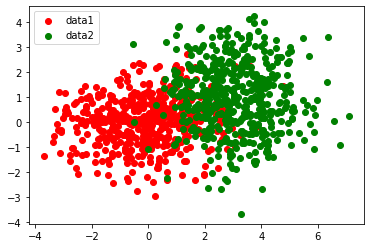

In [2]:
# Creating dataset with 1000 rows and 2 columns
# Plotting the dataset with the help of the matplotlib library.

mean_01 = [0,0]
cov_01 = [[2,0.2], [0.2,1]]

mean_02 = [3,1]
cov_02 = [[1.5,-0.2], [-0.2,2]]

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

print(dist_01.shape, dist_02.shape)

# Plot with scatter the two data clound of points
plt.figure()
plt.scatter(dist_01[:,0], dist_01[:,1], c = 'r', label = "data1")
plt.scatter(dist_02[:,0], dist_02[:,1], c = 'g', label = "data2")
plt.legend()
plt.show()

In [3]:
# Merged together the two dummies data set

# Create a dummy matrix: +1 is for the label
dataset = np.zeros((dist_01.shape[0] + dist_02.shape[0], dist_01.shape[1] + 1))
print("Data set's shape: ", dataset.shape)

# Filling in the two dataser
dataset[:dist_01.shape[0], :-1] = dist_01
dataset[dist_01.shape[0]:, :-1] = dist_02

# Red = 0, Green = 1
# The matrix is already all zeros, so we just need to
# overwrite 1 to lavel the green points
dataset[dist_02.shape[0]:, -1] = 1
dataset.shape

print(dataset[0])
print(dataset[-1])

Data set's shape:  (1000, 3)
[1.50613126 0.35080038 0.        ]
[ 4.17307693 -0.48284847  1.        ]


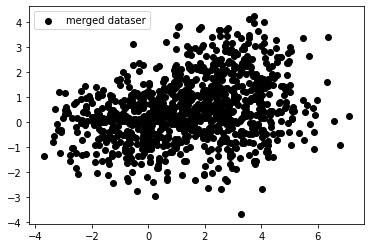

In [4]:
# Plot with scatter the two data clound of points
plt.figure()
plt.scatter(dataset[:,0], dataset[:,1],  c= "k", label = 'merged dataser')
plt.legend()
plt.show()

In [5]:
# In this step, we are going to split the dataset into training and test sets.
# 80% training & 20% test

# Shuffled the dataset so that both distributions get 
# mixed up properly so that they act as real-world problem dataset
np.random.shuffle(dataset)
X_train, X_test, y_train, y_test = train_test_split(dataset[:,:-1], dataset[:,-1], test_size=0.2)

print("Xtrain shape", X_train.shape)
print("Xtest shape", X_test.shape)
print("TargetTrain shape", y_train.shape)
print("TargetTest shape", y_test.shape)

Xtrain shape (800, 2)
Xtest shape (200, 2)
TargetTrain shape (800,)
TargetTest shape (200,)


In [12]:
# In this step, we will fit our dataset to 
# logistic regression with the help of sklearn.
sk_logreg = SKLR()
sk_logreg.fit(X_train, y_train)

LogisticRegression()

In [13]:
print("Train accuracy score:", sk_logreg.score(X_train, y_train))
print("Test accuracy score:", sk_logreg.score(X_test, y_test))

Train accuracy score: 0.8775
Test accuracy score: 0.895


Prediction:  [0.]


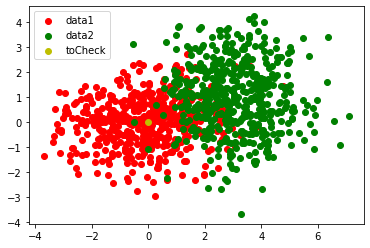

In [14]:
# Predict
pointToCheck = [[0,0]]

print("Prediction: ", sk_logreg.predict(pointToCheck))

# Plot with scatter the two data clound of points
plt.figure()
plt.scatter(dist_01[:,0], dist_01[:,1], c = 'r', label = "data1")
plt.scatter(dist_02[:,0], dist_02[:,1], c = 'g', label = "data2")
plt.scatter(pointToCheck[0][0], pointToCheck[0][1], s = 35, c = "y", label = "toCheck")
plt.legend()
plt.show()